Sample Rate: 44100 Hz
Number of Samples: 2646000
Duration: 60.0 seconds


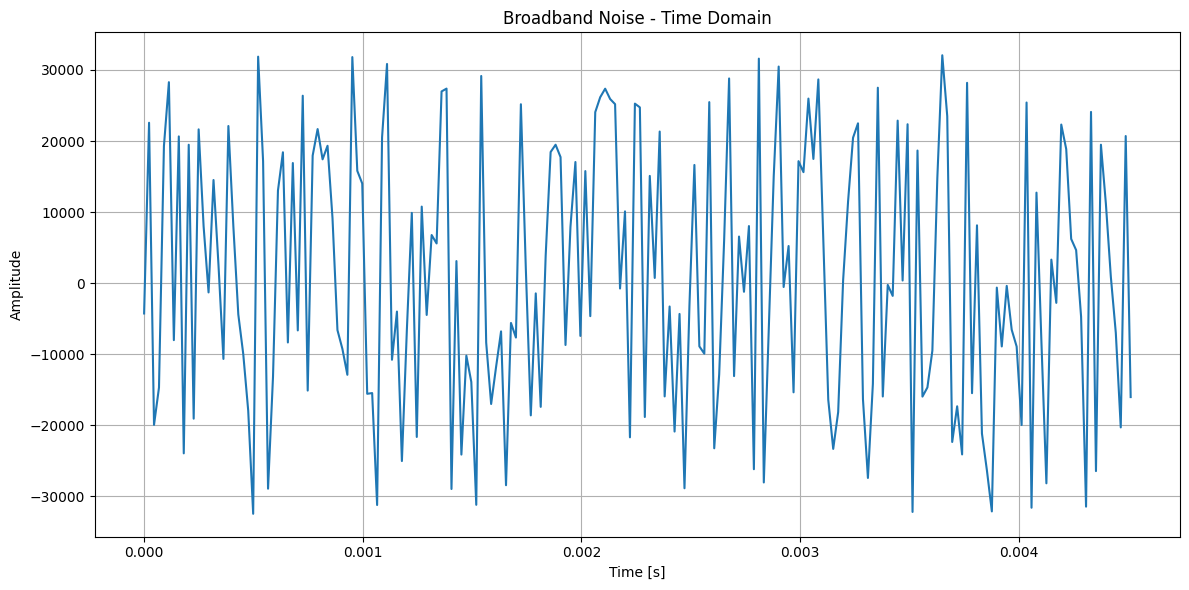

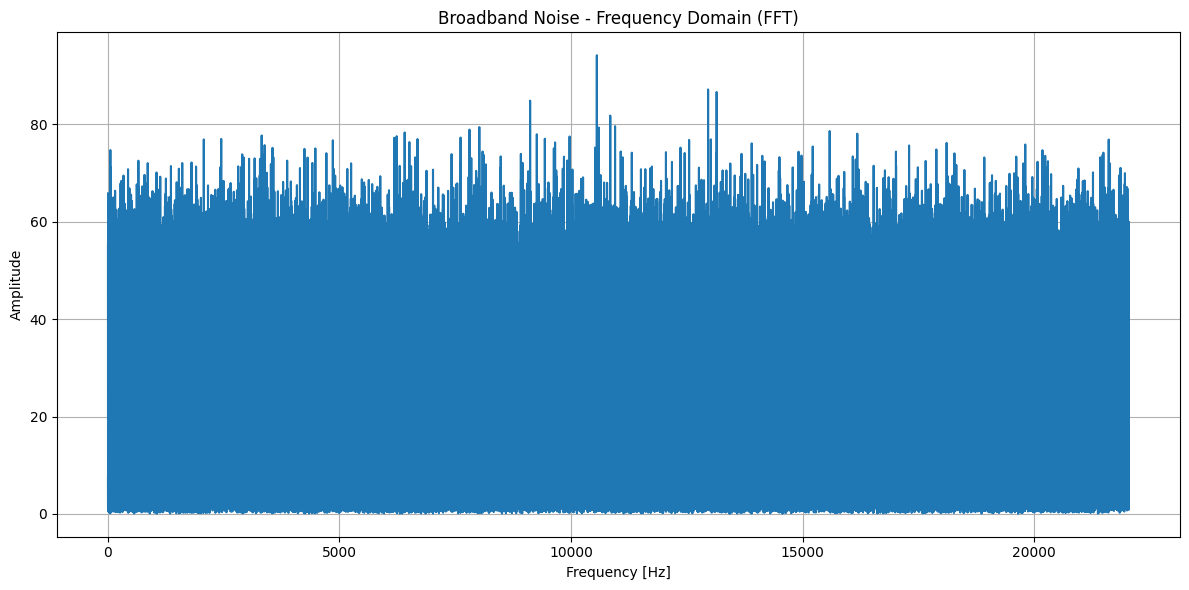

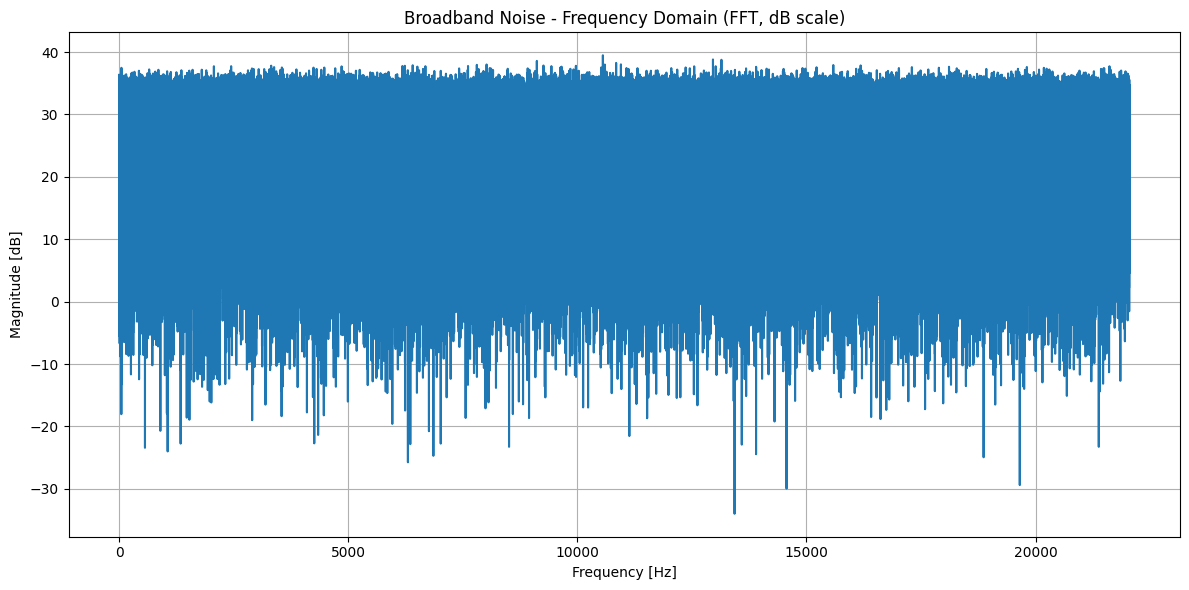

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read as wavFileReader

# Load broadband noise data
file_path = "Data/broadband_noise_44100Hz_16bit_1min.wav"
sample_rate, broadband_noise = wavFileReader(file_path)
duration = len(broadband_noise) / sample_rate

# Print basic information about the audio file
print(f"Sample Rate: {sample_rate} Hz")
print(f"Number of Samples: {len(broadband_noise)}")
print(f"Duration: {duration} seconds")

# Generate time values
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Plot the broadband noise in the time domain
plt.figure(figsize=(12, 6))
# plt.plot(np.linspace(0, len(broadband_noise) / sample_rate, len(broadband_noise)), broadband_noise)
plt.plot(t[:200], broadband_noise[:200])  # Plot first 200 samples
plt.title("Broadband Noise - Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# Plot the broadband noise in the frequency domain using FFT
plt.figure(figsize=(12, 6))
N = len(broadband_noise)
T = 1.0 / sample_rate
yf = np.fft.fft(broadband_noise)
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
plt.title("Broadband Noise - Frequency Domain (FFT)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# Plot the broadband noise in the frequency domain using FFT with dB scale
plt.figure(figsize=(12, 6))
yf = np.fft.fft(broadband_noise)
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 20 * np.log10(2.0 / N * np.abs(yf[:N // 2])))
plt.title("Broadband Noise - Frequency Domain (FFT, dB scale)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid()
plt.tight_layout()
plt.show()

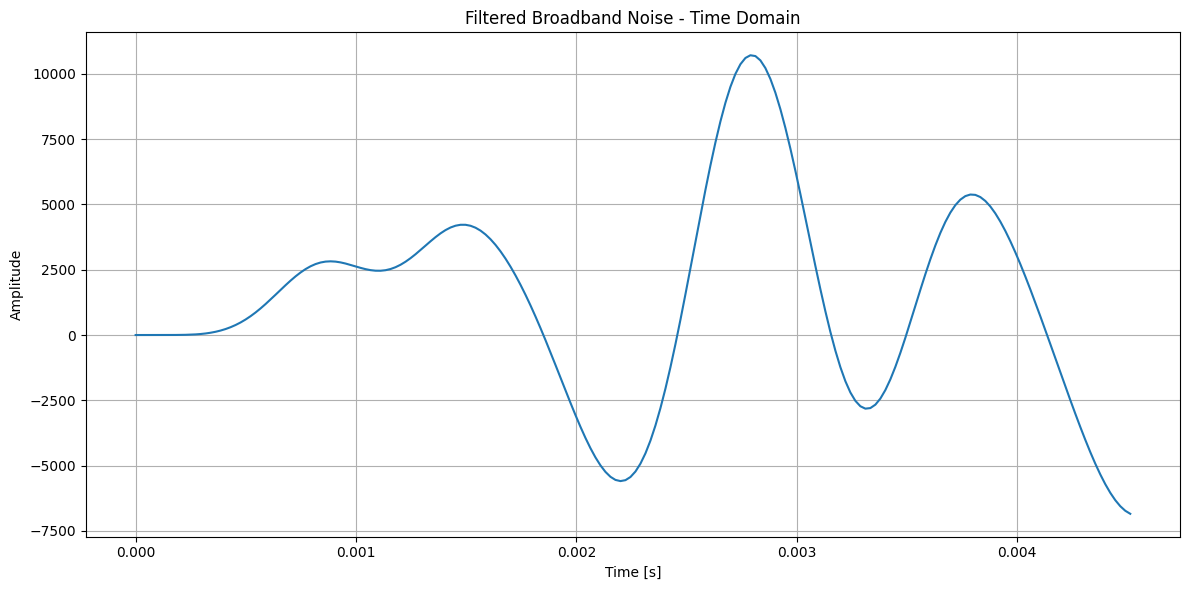

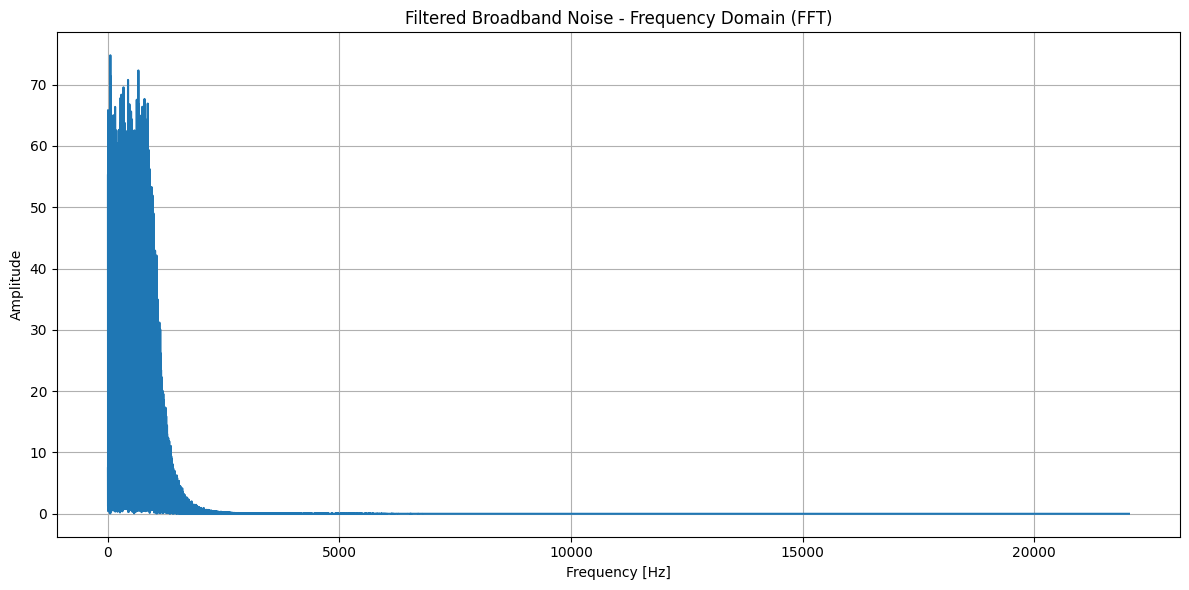

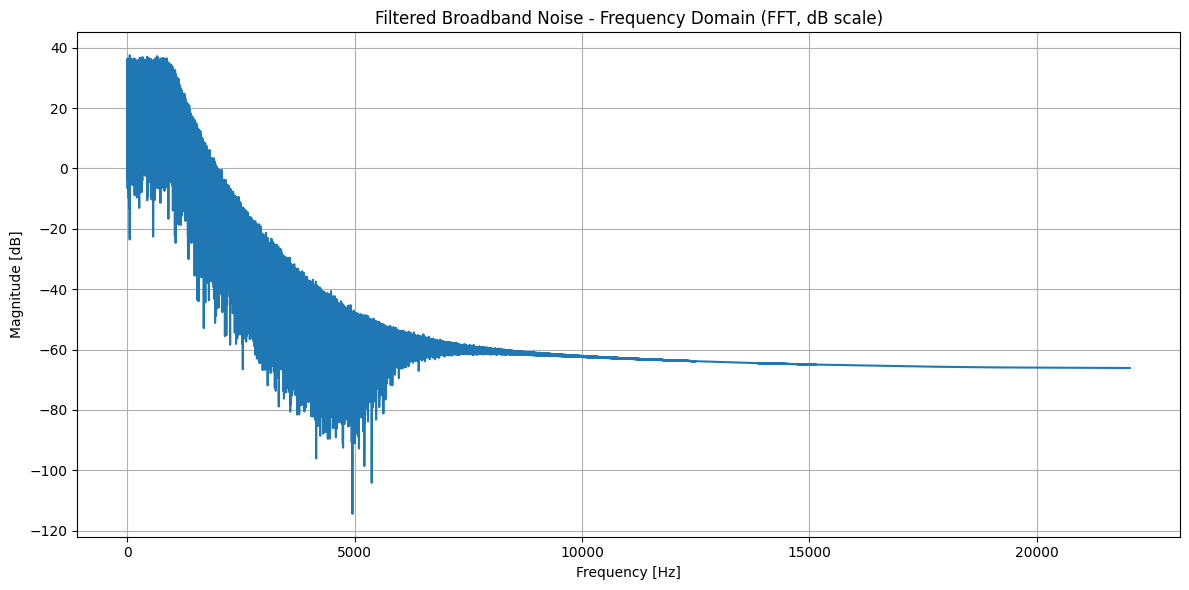

Filtered broadband noise saved to Output/filtered_broadband_noise.wav


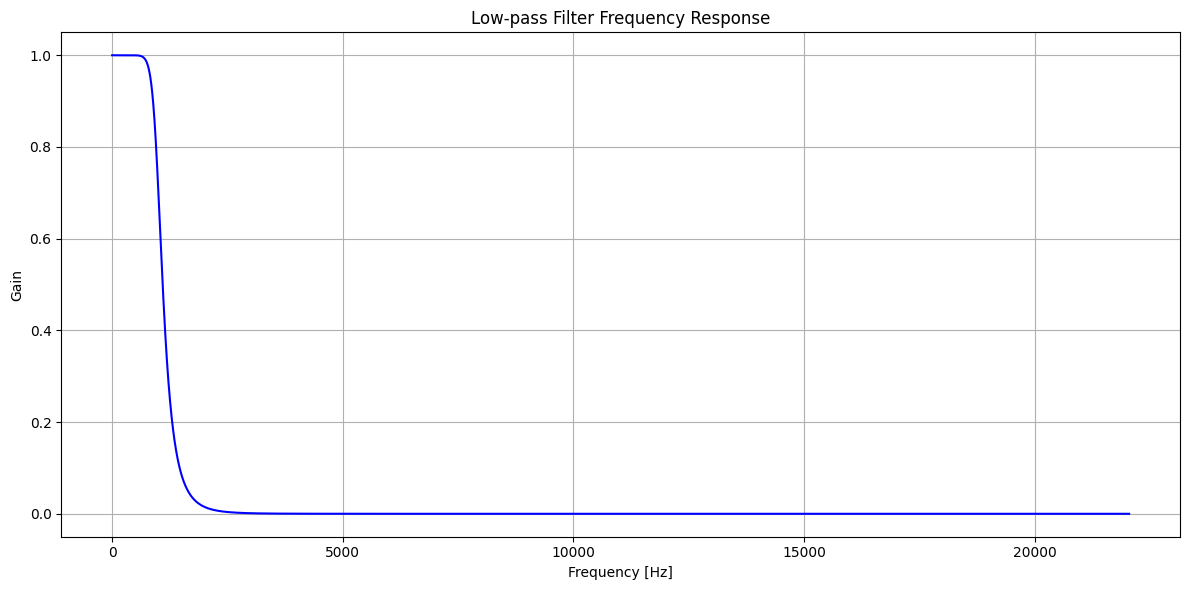

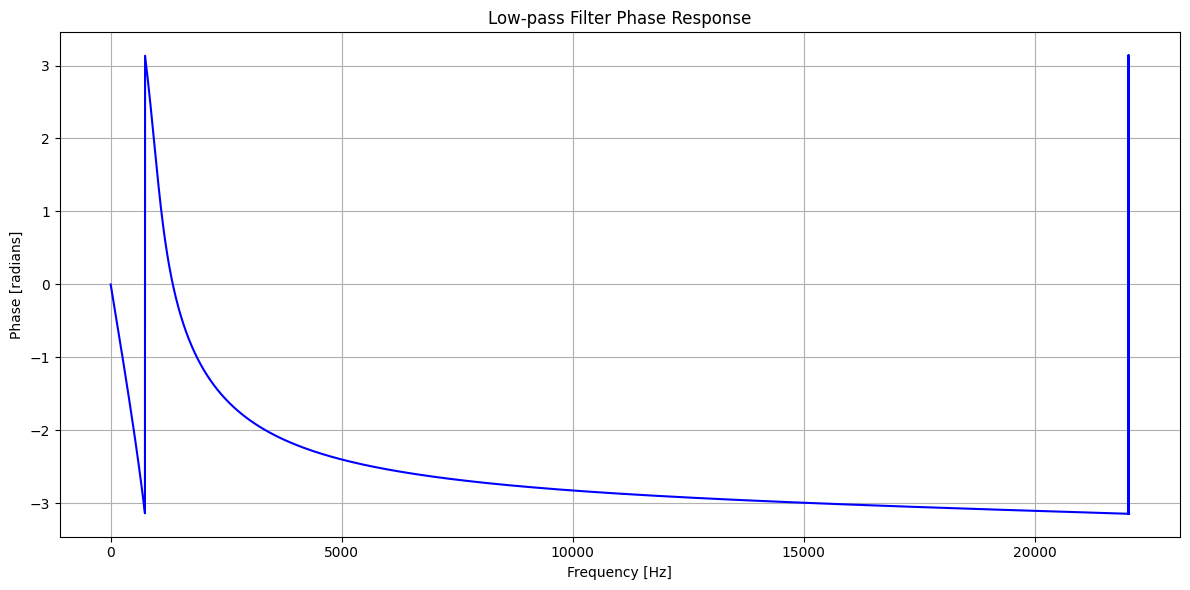

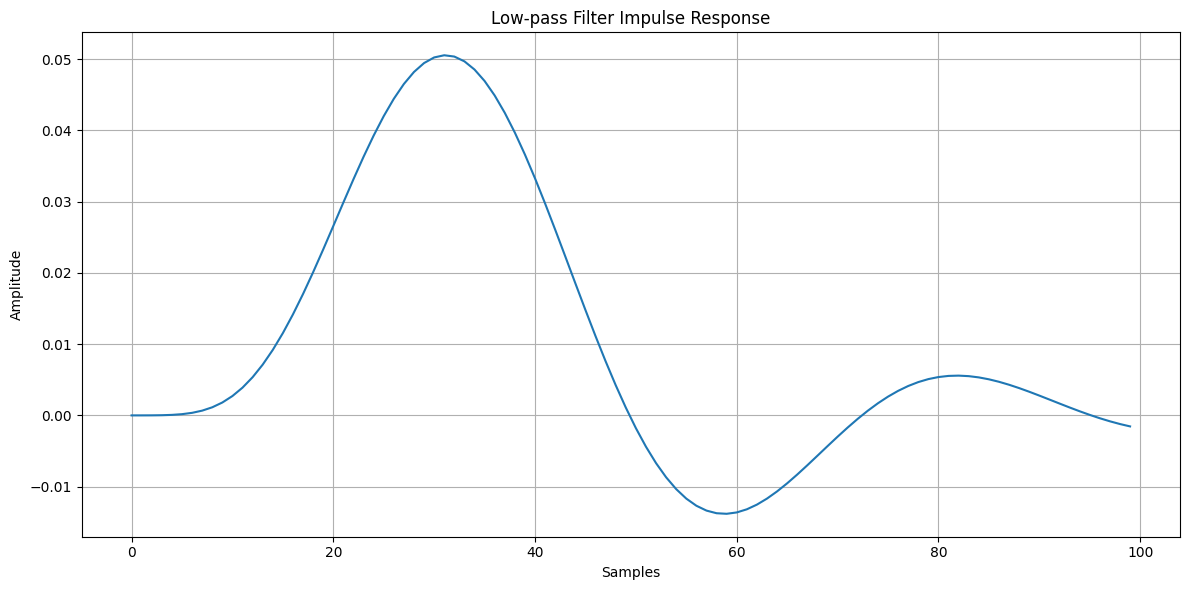

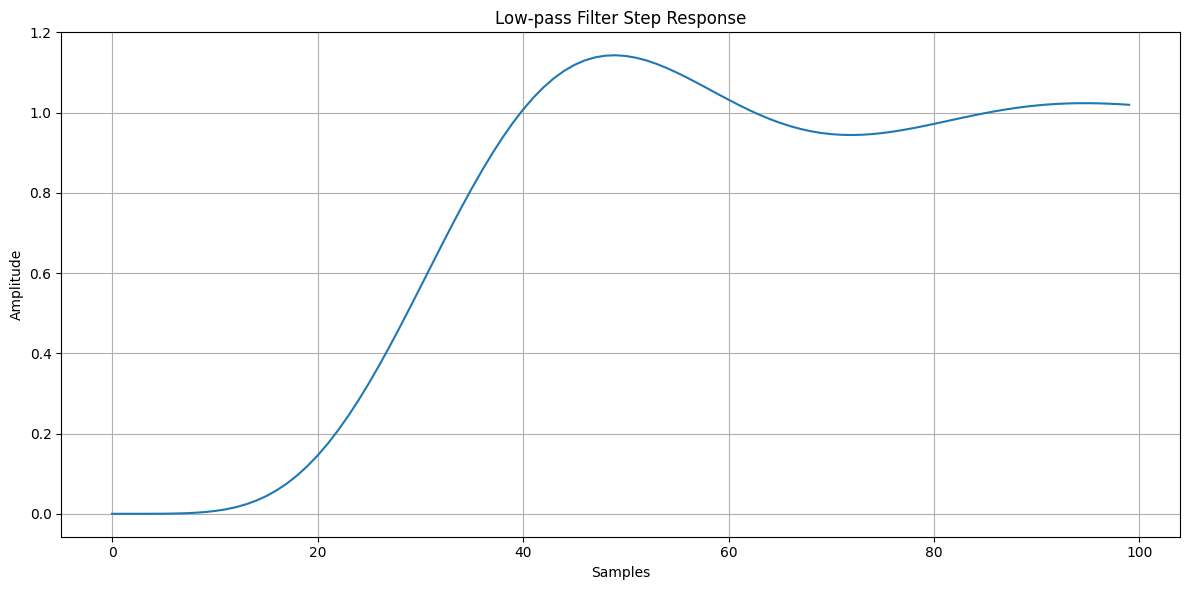

In [ ]:
# Design a low-pass filter
from scipy.signal import butter, lfilter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def lowpass_filter(data, cutoff, fs, order=5):  
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
# Apply the low-pass filter to the broadband noise
cutoff = 1000.0  # Desired cutoff frequency of the filter, Hz
order = 6
b, a = butter_lowpass(cutoff, sample_rate, order=order)
filtered_broadband_noise = lowpass_filter(broadband_noise, cutoff, sample_rate, order=order)
# Plot the filtered broadband noise in the time domain
plt.figure(figsize=(12, 6))
plt.plot(t[:200], filtered_broadband_noise[:200])  # Plot first 200 samples
plt.title("Filtered Broadband Noise - Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()
# Plot the filtered broadband noise in the frequency domain using FFT
plt.figure(figsize=(12, 6))
N = len(filtered_broadband_noise)
T = 1.0 / sample_rate
yf = np.fft.fft(filtered_broadband_noise)
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
plt.title("Filtered Broadband Noise - Frequency Domain (FFT)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()
# Plot the filtered broadband noise in the frequency domain using FFT with dB scale
plt.figure(figsize=(12, 6))
yf = np.fft.fft(filtered_broadband_noise)
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 20 * np.log10(2.0 / N * np.abs(yf[:N // 2])))
plt.title("Filtered Broadband Noise - Frequency Domain (FFT, dB scale)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid()
plt.tight_layout()
plt.show()
# Save the filtered broadband noise to a new WAV file
from scipy.io.wavfile import write as wavFileWriter
output_file_path = "Output/filtered_broadband_noise.wav"    
wavFileWriter(output_file_path, sample_rate, filtered_broadband_noise.astype(np.int16))
# Print confirmation message
print(f"Filtered broadband noise saved to {output_file_path}")
# Plot the frequency response of the low-pass filter
from scipy.signal import freqz
def plot_frequency_response(b, a):
    w, h = freqz(b, a, worN=8000)
    plt.figure(figsize=(12, 6))
    plt.plot(0.5 * sample_rate * w / np.pi, np.abs(h), 'b')
    plt.title("Low-pass Filter Frequency Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Gain")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the frequency response of the low-pass filter
plot_frequency_response(b, a)
# Plot the phase response of the low-pass filter
def plot_phase_response(b, a):
    w, h = freqz(b, a, worN=8000)
    plt.figure(figsize=(12, 6))
    plt.plot(0.5 * sample_rate * w / np.pi, np.angle(h), 'b')
    plt.title("Low-pass Filter Phase Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Phase [radians]")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the phase response of the low-pass filter
plot_phase_response(b, a)
# Plot the impulse response of the low-pass filter
def plot_impulse_response(b, a):
    impulse = np.zeros(100)
    impulse[0] = 1
    response = lfilter(b, a, impulse)
    plt.figure(figsize=(12, 6))
    plt.plot(response)
    plt.title("Low-pass Filter Impulse Response")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the impulse response of the low-pass filter
plot_impulse_response(b, a)
# Plot the step response of the low-pass filter
def plot_step_response(b, a):
    step = np.ones(100)
    response = lfilter(b, a, step)
    plt.figure(figsize=(12, 6))
    plt.plot(response)
    plt.title("Low-pass Filter Step Response")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
# Plot the step response of the low-pass filter
plot_step_response(b, a)
# Show all plots
plt.show()
# Close all plots
plt.close('all')
# End of the script

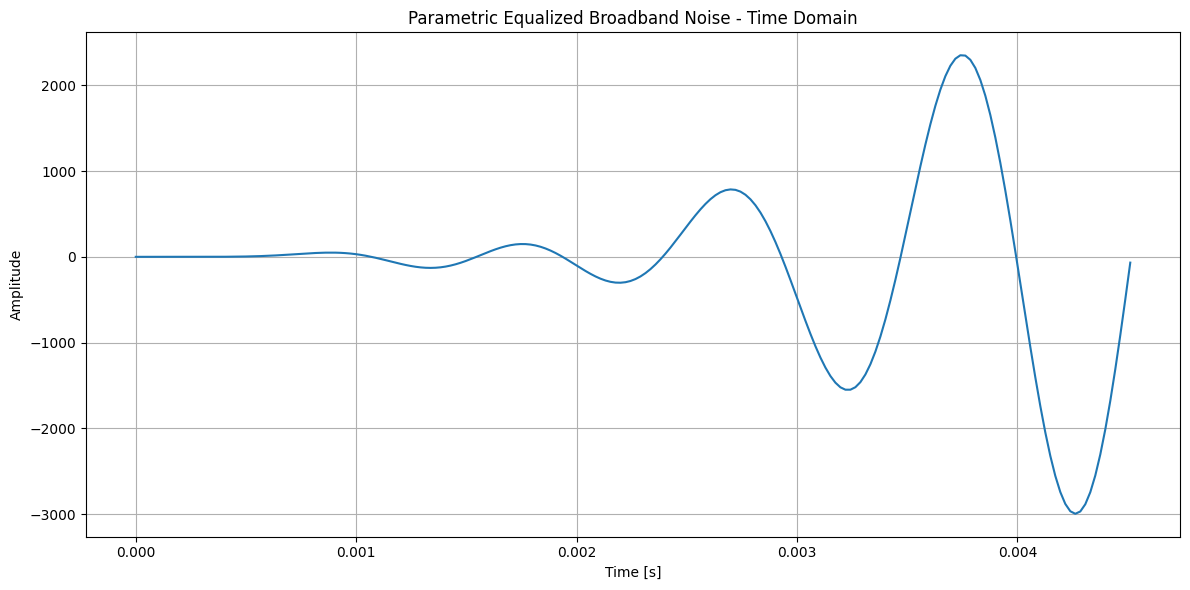

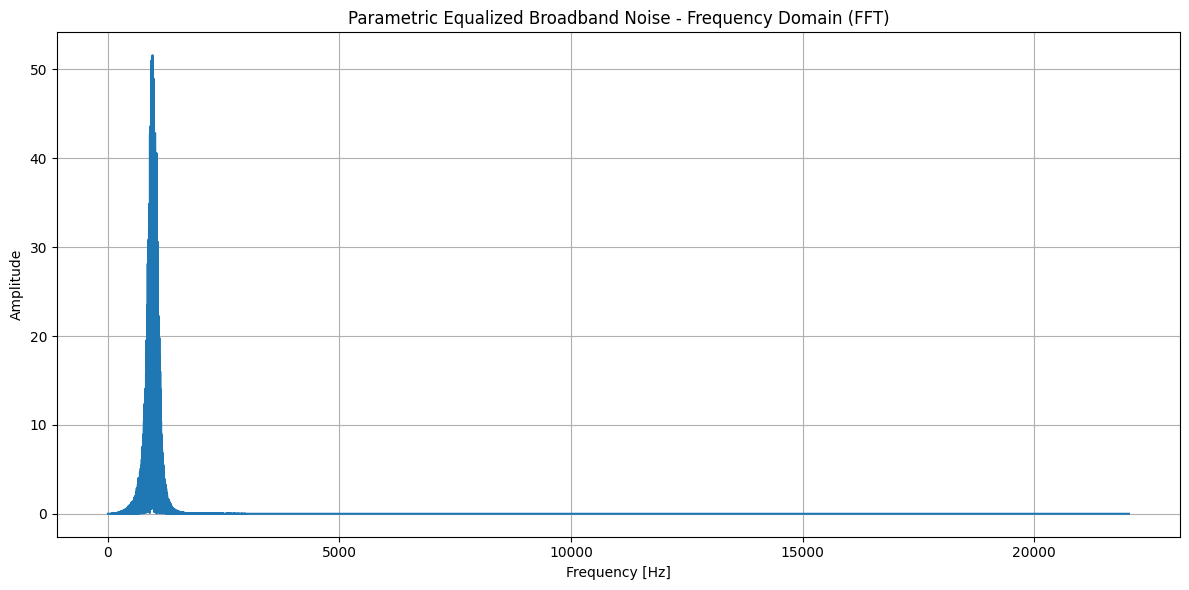

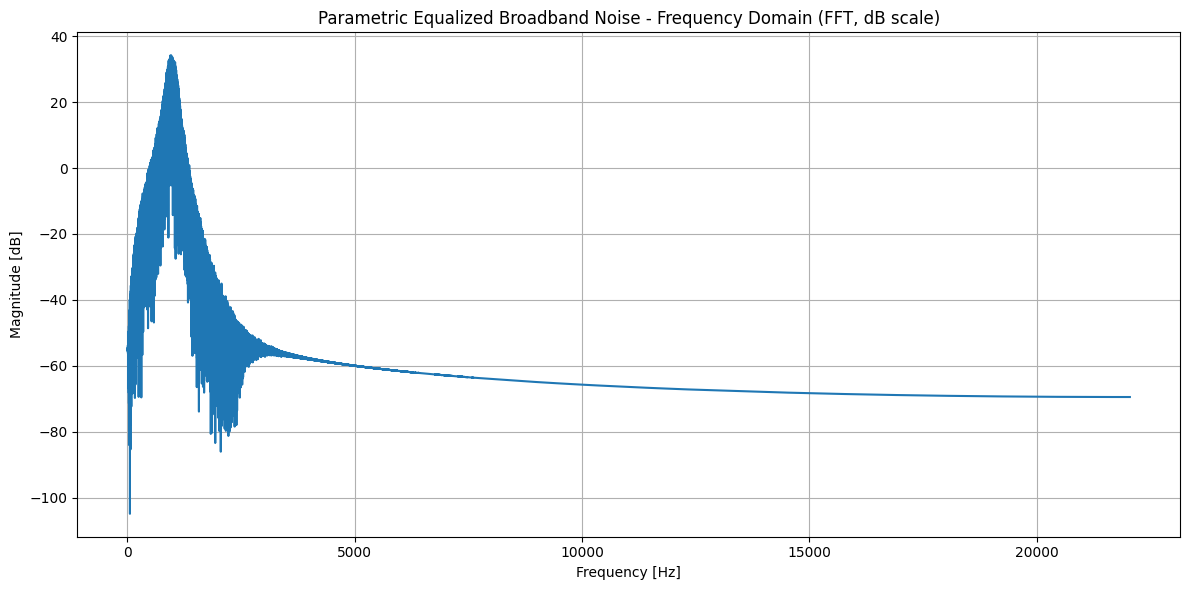

Parametric equalized broadband noise saved to Output/parametric_eq_broadband_noise.wav


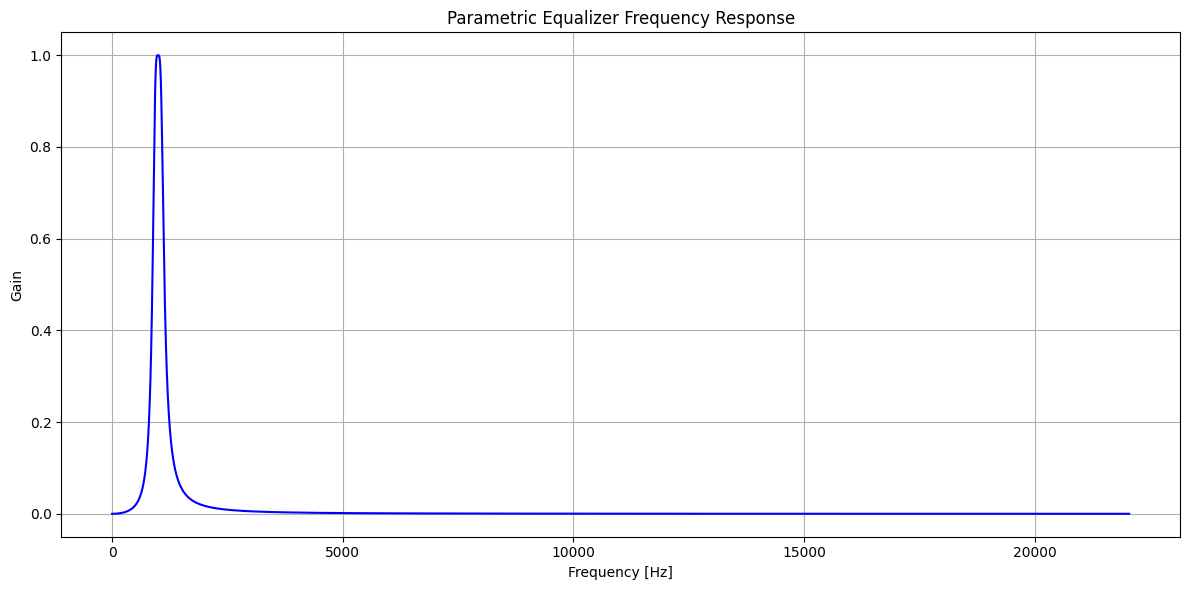

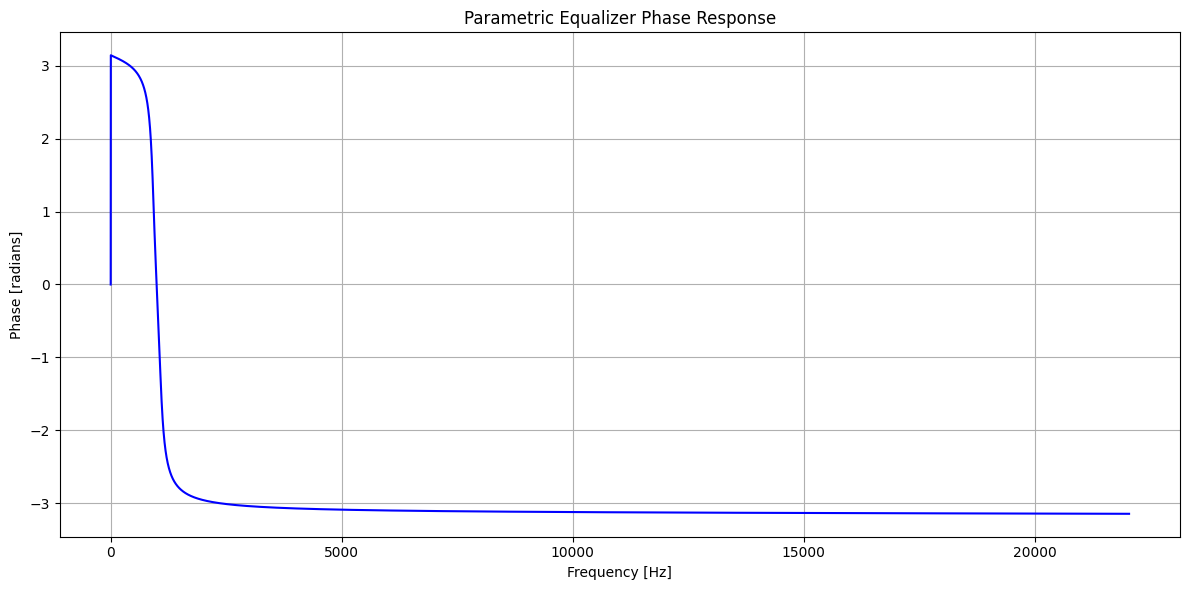

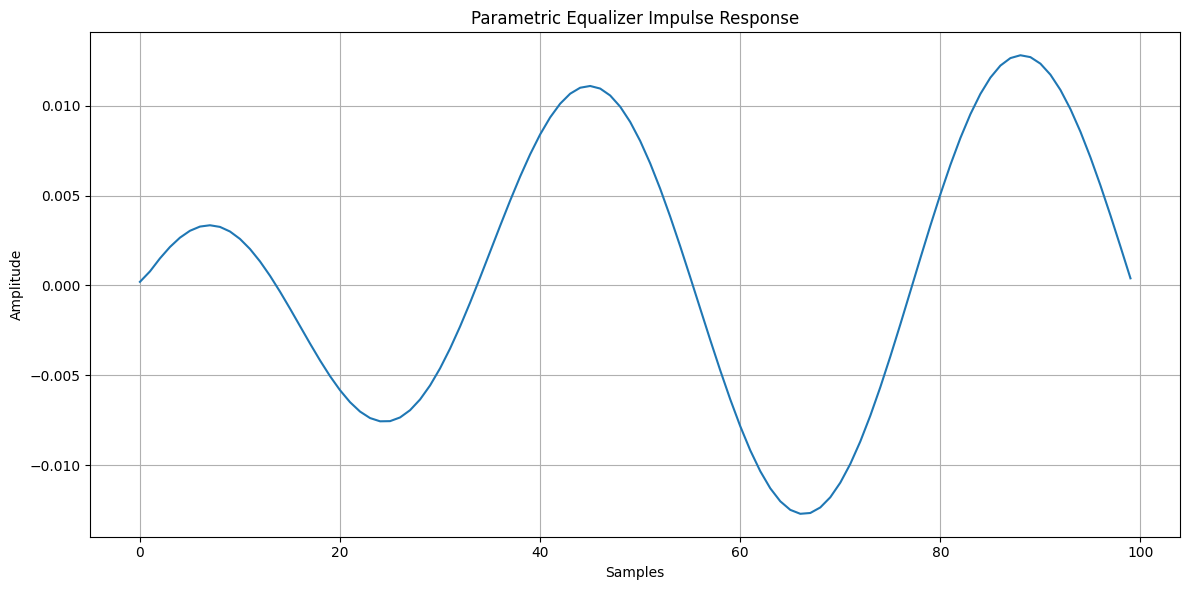

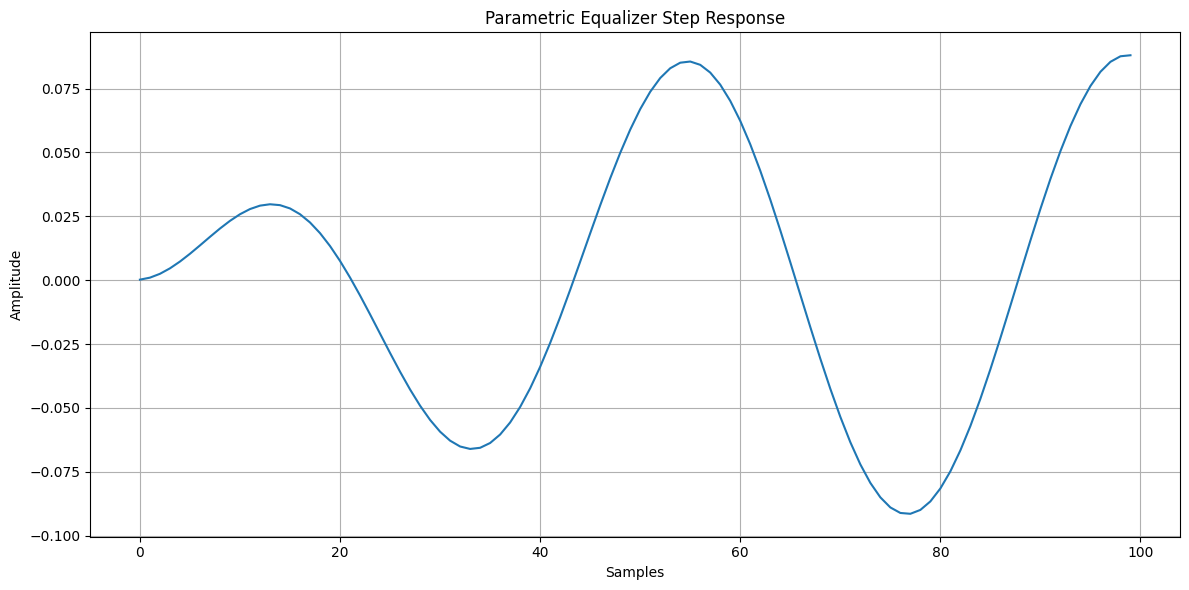

In [19]:
# Design a parametric equalizer
from scipy.signal import iirfilter, sosfreqz, sosfilt
def design_parametric_eq(fs, center_freq, bandwidth, gain):
    nyquist = 0.5 * fs
    low = center_freq - bandwidth / 2
    high = center_freq + bandwidth / 2
    low /= nyquist
    high /= nyquist
    b, a = iirfilter(2, [low, high], btype='band', ftype='butter')
    return b, a

def apply_parametric_eq(data, fs, center_freq, bandwidth, gain):
    nyquist = 0.5 * fs
    low = (center_freq - bandwidth / 2) / nyquist
    high = (center_freq + bandwidth / 2) / nyquist
    sos = iirfilter(2, [low, high], btype='band', ftype='butter', output='sos')
    filtered_data = sosfilt(sos, data)
    return filtered_data

# Apply the parametric equalizer to the filtered broadband noise
center_freq = 1000.0  # Center frequency of the bandpass filter
bandwidth = 200.0  # Bandwidth of the bandpass filter
gain = 3.0  # Gain in dB
parametric_eq_broadband_noise = apply_parametric_eq(filtered_broadband_noise, sample_rate, center_freq, bandwidth, gain)

# Plot the parametric equalized broadband noise in the time domain
plt.figure(figsize=(12, 6))
plt.plot(t[:200], parametric_eq_broadband_noise[:200])  # Plot first 200 samples
plt.title("Parametric Equalized Broadband Noise - Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()      
plt.tight_layout()
plt.show()

# Plot the parametric equalized broadband noise in the frequency domain using FFT
plt.figure(figsize=(12, 6))
N = len(parametric_eq_broadband_noise)
T = 1.0 / sample_rate
yf = np.fft.fft(parametric_eq_broadband_noise)  
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
plt.title("Parametric Equalized Broadband Noise - Frequency Domain (FFT)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# Plot the parametric equalized broadband noise in the frequency domain using FFT with dB scale
plt.figure(figsize=(12, 6))
yf = np.fft.fft(parametric_eq_broadband_noise)
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 20 * np.log10(2.0 / N * np.abs(yf[:N // 2])))
plt.title("Parametric Equalized Broadband Noise - Frequency Domain (FFT, dB scale)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid()
plt.tight_layout()
plt.show()

# Save the parametric equalized broadband noise to a new WAV file
output_file_path_eq = "Output/parametric_eq_broadband_noise.wav"
wavFileWriter(output_file_path_eq, sample_rate, parametric_eq_broadband_noise.astype(np.int16))
# Print confirmation message
print(f"Parametric equalized broadband noise saved to {output_file_path_eq}")

# Plot the frequency response of the parametric equalizer
from scipy.signal import sosfreqz
def plot_parametric_eq_frequency_response(fs, center_freq, bandwidth):
    nyquist = 0.5 * fs
    low = (center_freq - bandwidth / 2) / nyquist
    high = (center_freq + bandwidth / 2) / nyquist
    sos = iirfilter(2, [low, high], btype='band', ftype='butter', output='sos')  # Use SOS format
    w, h = sosfreqz(sos, worN=8000)  # Compute frequency response
    plt.figure(figsize=(12, 6))
    plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
    plt.title("Parametric Equalizer Frequency Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Gain")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the frequency response of the parametric equalizer
plot_parametric_eq_frequency_response(sample_rate, center_freq, bandwidth)

# Plot the phase response of the parametric equalizer
from scipy.signal import sosfreqz
def plot_parametric_eq_phase_response(fs, center_freq, bandwidth):
    nyquist = 0.5 * fs
    low = (center_freq - bandwidth / 2) / nyquist
    high = (center_freq + bandwidth / 2) / nyquist
    sos = iirfilter(2, [low, high], btype='band', ftype='butter', output='sos')  # Use SOS format
    w, h = sosfreqz(sos, worN=8000)  # Compute frequency response
    plt.figure(figsize=(12, 6))
    plt.plot(0.5 * fs * w / np.pi, np.angle(h), 'b')
    plt.title("Parametric Equalizer Phase Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Phase [radians]")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the phase response of the parametric equalizer
plot_parametric_eq_phase_response(sample_rate, center_freq, bandwidth)

# Plot the impulse response of the parametric equalizer
from scipy.signal import sosfilt
def plot_parametric_eq_impulse_response(fs, center_freq, bandwidth):
    nyquist = 0.5 * fs
    low = (center_freq - bandwidth / 2) / nyquist
    high = (center_freq + bandwidth / 2) / nyquist
    sos = iirfilter(2, [low, high], btype='band', ftype='butter', output='sos')  # Use SOS format
    impulse = np.zeros(100)
    impulse[0] = 1  # Create an impulse signal
    response = sosfilt(sos, impulse)  # Filter the impulse signal
    plt.figure(figsize=(12, 6))
    plt.plot(response)
    plt.title("Parametric Equalizer Impulse Response")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the impulse response of the parametric equalizer
plot_parametric_eq_impulse_response(sample_rate, center_freq, bandwidth)

# Plot the step response of the parametric equalizer
from scipy.signal import sosfilt
def plot_parametric_eq_step_response(fs, center_freq, bandwidth):
    nyquist = 0.5 * fs
    low = (center_freq - bandwidth / 2) / nyquist
    high = (center_freq + bandwidth / 2) / nyquist
    sos = iirfilter(2, [low, high], btype='band', ftype='butter', output='sos')  # Use SOS format
    step = np.ones(100)  # Create a step signal
    response = sosfilt(sos, step)  # Filter the step signal
    plt.figure(figsize=(12, 6))
    plt.plot(response)
    plt.title("Parametric Equalizer Step Response")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the step response of the parametric equalizer
plot_parametric_eq_step_response(sample_rate, center_freq, bandwidth)
# Show all plots
plt.show()
# Close all plots
plt.close('all')

# Explain impulse response, step response, and frequency response
# Impulse response: The impulse response of a filter is the output of the filter when an impulse (a signal with a single non-zero value) is applied to it. It characterizes how the filter responds to a brief input signal and provides insight into the filter's time-domain behavior.
# Step response: The step response of a filter is the output of the filter when a step function (a signal that changes from zero to one at a specific time) is applied to it. It characterizes how the filter responds to a sudden change in input and provides insight into the filter's transient behavior.
# Frequency response: The frequency response of a filter describes how the filter affects different frequencies of the input signal. It is typically represented as a plot of gain (amplitude) versus frequency, showing how the filter amplifies or attenuates different frequency components of the input signal.